In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import quantecon as qe
from numba import njit
from scipy.linalg import expm

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [2]:
Q = ((-3, 2, 1),
     (3, -5, 2),
     (4, 6, -10))

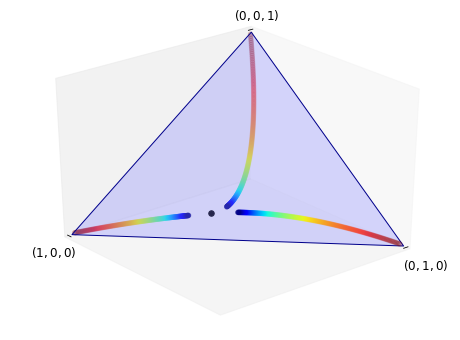

In [3]:
def unit_simplex(angle):
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    vtx = [[0, 0, 1],
           [0, 1, 0], 
           [1, 0, 0]]
    
    tri = Poly3DCollection([vtx], color='darkblue', alpha=0.3)
    tri.set_facecolor([0.5, 0.5, 1])
    ax.add_collection3d(tri)

    ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1), 
           xticks=(1,), yticks=(1,), zticks=(1,))

    ax.set_xticklabels(['$(1, 0, 0)$'], fontsize=12)
    ax.set_yticklabels(['$(0, 1, 0)$'], fontsize=12)
    ax.set_zticklabels(['$(0, 0, 1)$'], fontsize=12)

    ax.xaxis.majorTicks[0].set_pad(15)
    ax.yaxis.majorTicks[0].set_pad(15)
    ax.zaxis.majorTicks[0].set_pad(35)

    ax.view_init(30, angle)

    # Move axis to origin
    ax.xaxis._axinfo['juggled'] = (0, 0, 0)
    ax.yaxis._axinfo['juggled'] = (1, 1, 1)
    ax.zaxis._axinfo['juggled'] = (2, 2, 0)
    
    ax.grid(False)
    
    return ax

Q = np.array(Q)
ψ_00 = np.array((0.01, 0.01, 0.99))
ψ_01 = np.array((0.01, 0.99, 0.01))
ψ_02 = np.array((0.99, 0.01, 0.01))

ax = unit_simplex(angle=50)    

def flow_plot(ψ, h=0.001, n=300, angle=50):
    colors = cm.jet_r(np.linspace(0.0, 1, n))

    x_vals, y_vals, z_vals = [], [], []
    for t in range(n):
        x_vals.append(ψ[0])
        y_vals.append(ψ[1])
        z_vals.append(ψ[2])
        ψ = ψ @ expm(h * Q)

    ax.scatter(x_vals, y_vals, z_vals, c=colors, s=20, alpha=0.2, depthshade=False)

flow_plot(ψ_00)
flow_plot(ψ_01)
flow_plot(ψ_02)

# Add stationary distribution
P_1 = expm(Q)
mc = qe.MarkovChain(P_1)
ψ = mc.stationary_distributions[0]
ax.scatter(ψ[0], ψ[1], ψ[2], c='k', s=30, depthshade=False)

plt.show()